 # MKA-MLF, Lab_07 Convolutional Neural Networks

## Exercise - XOR Gate

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

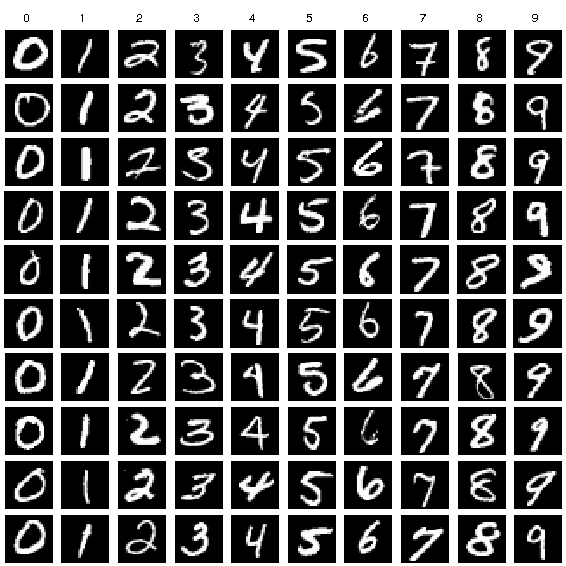

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
###################################
# Write your own code here #
from keras.utils import to_categorical #for data preprocessing
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization,Dropout #for model building
from keras.callbacks import EarlyStopping, LearningRateScheduler
import math
from sklearn.metrics import classification_report

###################################
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [22]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### 1.2 Dataset examination

Using the following code, display random images,

In [24]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

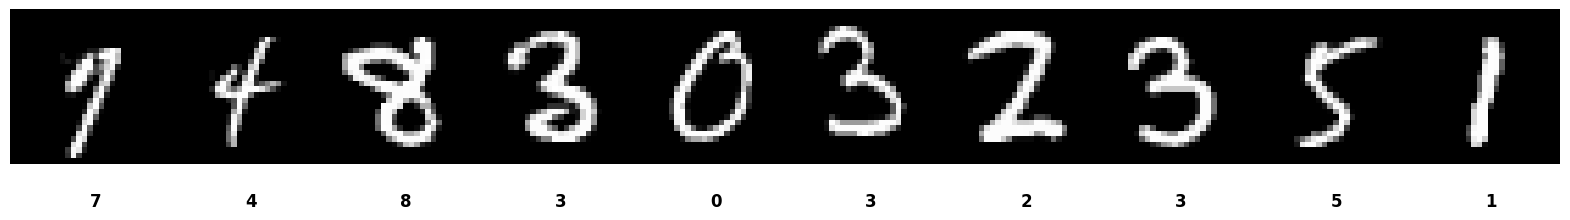

In [25]:
display_random_images(X_train, y_train)

Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset?
- How many data samples do we have in train and test datasets?
- How many colour channels does the input variable have?
- What is the size of the input images?
- What is the necessary preprocessing of the input data X?
- How many classes do we have in target variable? 10 classes
- What is the necessary preprocessing of target variable y?

#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [26]:
# Check the shape of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Check the data type of the arrays
print("X_train data type:", X_train.dtype)
print("y_train data type:", y_train.dtype)

# Check unique values in the target variable
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train data type: uint8
y_train data type: uint8
Unique values in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique values in y_test: [0 1 2 3 4 5 6 7 8 9]


In [27]:
# Check the number of color channels
if len(X_train.shape) == 4:
    print("Number of color channels:", X_train.shape[-1])
else:
    print("Number of color channels: 1 (grayscale)")

Number of color channels: 1 (grayscale)


In [ ]:
X_train =X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    
    


#### 2.1 Define the model structure

In [ ]:
# Build the model
def build_model(input_shape=(28, 28, 1), num_classes=10):
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer='he_normal'),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal'),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Dropout(0.4),
        Flatten(),
        Dense(128, activation='relu', kernel_initializer='he_normal'),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
model.summary()
#I build a model with 2 convolutional layers, 2 maxpooling layers, 1 batch normalization layer, 1 dropout layer, 2 dense layers. The model is compiled with adam optimizer, categorical crossentropy loss function and accuracy metric.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 5, 5, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 969,994 (3.70 MB)

 Trainable params: 969,482 (3.70 MB)

 Non-trainable params: 512 (2.00 KB)

### 3. Training stage

In [ ]:
#I aim to improve efficiency and performance of the model by using the following techniques:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Adding callbacks for early stopping and learning rate scheduling
def lr_scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * math.exp(-0.1)

lr_callback = LearningRateScheduler(lr_scheduler)

# Adding EarlyStopping to stop training when validation loss stops improving
# Adding LearningRateScheduler to adjust the learning rate dynamically during training
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop, lr_callback])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step - accuracy: 0.9160 - loss: 0.3006 - val_accuracy: 0.9833 - val_loss: 0.0505 - learning_rate: 0.0010
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step - accuracy: 0.9855 - loss: 0.0490 - val_accuracy: 0.9872 - val_loss: 0.0429 - learning_rate: 0.0010
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 65ms/step - accuracy: 0.9892 - loss: 0.0335 - val_accuracy: 0.9860 - val_loss: 0.0461 - learning_rate: 0.0010
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 65ms/step - accuracy: 0.9914 - loss: 0.0269 - val_accuracy: 0.9890 - val_loss: 0.0370 - learning_rate: 0.0010
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.9926 - loss: 0.0230 - val_accuracy: 0.9895 - val_loss: 0.0360 - learning_rate: 0.0010
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step - accuracy: 0.9940 - loss: 0.0179 - val_accuracy: 0.9893 - val_loss: 0.0426 - learning_rate: 9.0484e-04
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 65ms/step - accuracy: 0.9957

#### 3.1 Model Evaluation on validation data

In [36]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 99.19%


### 4. Model evaluation

Plot the development of the training and validation loss, and training and validation metrics.

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

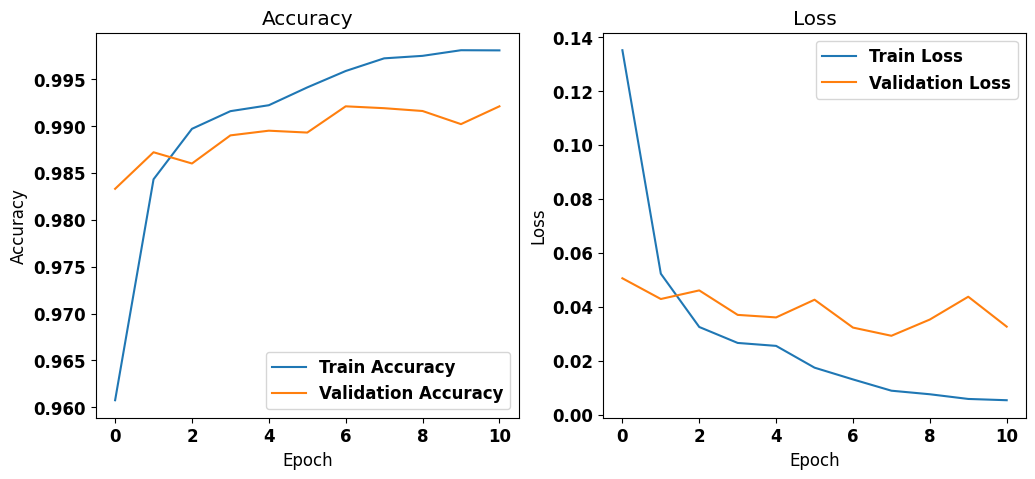

In [ ]:
#These graph shows the accuracy and loss of the model during training and validation steps. The model seems to be overfitting since the validation accuracy is lower than the training accuracy. The model can be improved by adding more dropout layers, increasing the number of epochs, adding more data augmentation techniques, etc.
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


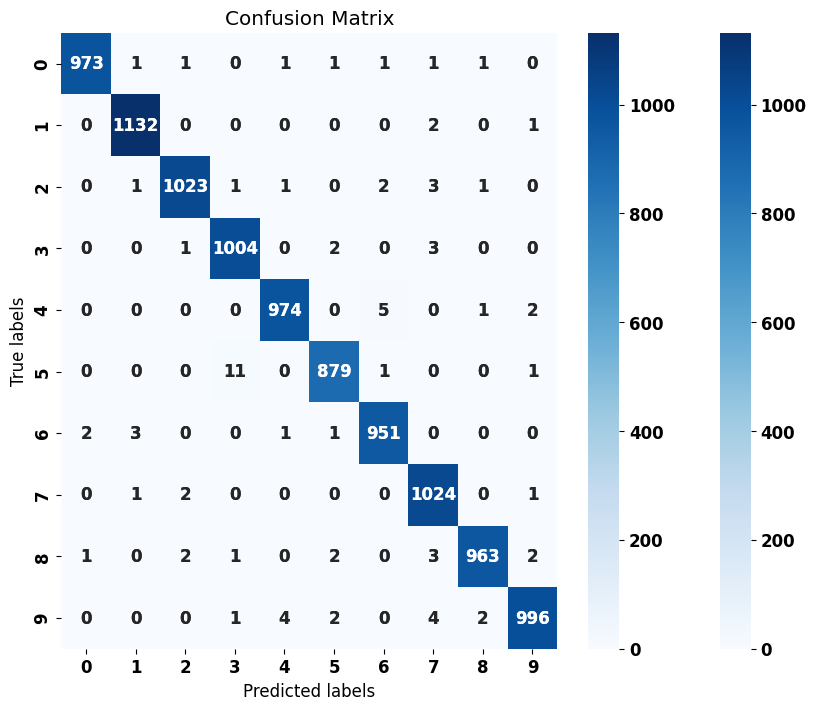

In [ ]:
###################################
# Write your own code here #
# Confusion Matrix help us to understand the performance of the model. It shows the number of correct and incorrect predictions made by the model. The diagonal elements represent the number of correct predictions, while the off-diagonal elements represent the number of incorrect predictions.
# I will use the confusion matrix to evaluate the performance of the model on the test data.
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


###################################

In [ ]:
# Classification report provides a summary of different evaluation metrics such as precision, recall, f1-score, and support for each class in the dataset.
report = classification_report(y_true, y_pred_classes, target_names=labels)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

